# Protein Voxelization
* Voxelization: The process of converting a data structures that store geometric information in a continuous domain (such as a 3D triangular mesh) into a rasterized image (a discrete grid)

<img src="./images/pdb.png" style="width:800px;height:200px">

* For protein voxelization, we will map atom coordinates (continuous space) in a pdb file to a 3 dimensional array (discrete space)

    * x, y, z coordinates of atoms (after rounded) in a pdb file will be indices for a 3d array

    * Residue level voxelization can be performed in the same way

In [1]:
import numpy as np

sample_pdb_path = '/local/storage/dl953/stat_and_coding/sample_pdbs/'
pdb = open(sample_pdb_path + "Q9UKK6.txt", 'r') # importing pdb file

# taking x, y, z coordinates and atom types
# x, y, z coordinates will be used for indices of 3d array
pdb = [l.strip() for l in pdb.readlines()]
pdb = [[float(l[32:38]), float(l[40:46]), float(l[48:54]), l[77]] for l in pdb]
pdb = np.array(pdb, dtype = 'object') # convert to np array
print(pdb)

[[25.924 11.29 67.569 'N']
 [26.888 10.481 66.831 'C']
 [28.088 10.131 67.704 'C']
 ...
 [34.007 17.783 20.618 'O']
 [31.622 19.034 19.966 'C']
 [32.141 19.649 21.132 'O']]


In [2]:
x_min, y_min, z_min = np.min(pdb[:,0]), np.min(pdb[:,1]), np.min(pdb[:,2])
x_max, y_max, z_max = np.max(pdb[:,0]), np.max(pdb[:,1]), np.max(pdb[:,2])
print(x_min, y_min, z_min)
print(x_max, y_max, z_max)

18.833 -7.081 18.749
58.693 25.617 68.701


In [3]:
# subtract min value along x, y, z axis
# round coordinates
pdb[:,:3] = pdb[:,:3] - pdb[:,:3].min(axis = 0)
pdb[:,:3] = np.around(pdb[:,:3].astype(float)).astype(int)
x_min, y_min, z_min = np.min(pdb[:,0]), np.min(pdb[:,1]), np.min(pdb[:,2])
x_max, y_max, z_max = np.max(pdb[:,0]), np.max(pdb[:,1]), np.max(pdb[:,2])
print(x_min, y_min, z_min)
print(x_max, y_max, z_max)

0 0 0
40 33 50


In [4]:
print(pdb)

[[7 18 49 'N']
 [8 18 48 'C']
 [9 17 49 'C']
 ...
 [15 25 2 'O']
 [13 26 1 'C']
 [13 27 2 'O']]


In [5]:
# bounding box is the minumum size of 3-dimensional array that contains the protein
# The last dimension is 4 for the different atom types (N, C, O, S)
bounding_box = np.zeros((np.max(pdb[:,0]) + 1, np.max(pdb[:,1]) + 1, np.max(pdb[:,2]) + 1, 4))

# function to assign each atom to bounding box
# input: coordinates and atom type
# output: assignment (assignment means to add 1 to the corresponding position)
def atom_assignment(coord_type):
    # if the atom type is N, it is assigned to the first channel of the corresponding coordinate.
    # and other types of atoms are also assigned according to their coordinates
    if coord_type[-1] == 'N':
        bounding_box[coord_type[0], coord_type[1], coord_type[2], 0] += 1
    if coord_type[-1] == 'C':
        bounding_box[coord_type[0], coord_type[1], coord_type[2], 1] += 1
    if coord_type[-1] == 'O':
        bounding_box[coord_type[0], coord_type[1], coord_type[2], 2] += 1
    if coord_type[-1] == 'S':
        bounding_box[coord_type[0], coord_type[1], coord_type[2], 3] += 1
    return None

In [6]:
# Execute atom_assignment where atom_assignment operates on each row of pdb.
np.apply_along_axis(atom_assignment, 1, pdb)

array([None, None, None, ..., None, None, None], dtype=object)

# Visualization

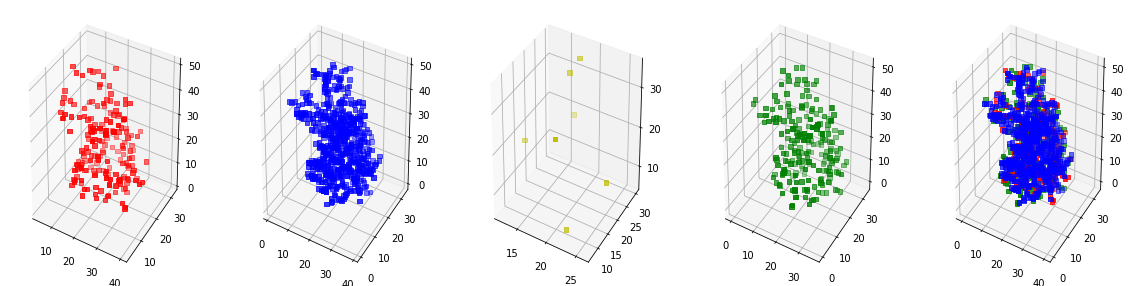

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 5))

atm_N = bounding_box[:,:,:,0]
atm_N = np.nonzero(atm_N)

atm_C = bounding_box[:,:,:,1]
atm_C = np.nonzero(atm_C)

atm_O = bounding_box[:,:,:,2]
atm_O = np.nonzero(atm_O)

atm_S = bounding_box[:,:,:,3]
atm_S = np.nonzero(atm_S)

# visualize the voxelized protein at channel (atom type) level
ax1 = fig.add_subplot(1, 5, 1, projection = '3d')
ax1.scatter(atm_N[0], atm_N[1], atm_N[2], c = 'r', marker = 's')

ax2 = fig.add_subplot(1, 5, 2, projection = '3d')
ax2.scatter(atm_C[0], atm_C[1], atm_C[2], c = 'b', marker = 's')

ax3 = fig.add_subplot(1, 5, 3, projection = '3d')
ax3.scatter(atm_S[0], atm_S[1], atm_S[2], c = 'y', marker = 's')

ax4 = fig.add_subplot(1, 5, 4, projection = '3d')
ax4.scatter(atm_O[0], atm_O[1], atm_O[2], c = 'g', marker = 's')

ax5 = fig.add_subplot(1, 5, 5, projection = '3d')
ax5.scatter(atm_N[0], atm_N[1], atm_N[2], c = 'r', marker = 's')
ax5.scatter(atm_C[0], atm_C[1], atm_C[2], c = 'b', marker = 's')
ax5.scatter(atm_S[0], atm_S[1], atm_S[2], c = 'y', marker = 's')
ax5.scatter(atm_O[0], atm_O[1], atm_O[2], c = 'g', marker = 's')